# ♣ 머신러닝 차원축소 ♣
- 변수(피쳐 혹은 컬럼이라고도 함) 의 조합을 통해 새로운 변수 발견 

## 1. Feature Selection

- 가지고 있는 변수들 중에 의미있는 변수만 선택
- 변수를 선택하는 방법은 주로 상관분석을 이용(공분산과 상관계수)

##  2. Feature Extraction 
- 변수추출 (1,2,3 번 변수를 조합해서 A,B라는 새로운 변수를 생성)
- 주로 사용되는 방법은 주성분분석(PCA : Principal Componene Analysis)
- PCA 실행결과 나온 Variance를 그래프로 그린 뒤 급격하게 떨어지는 지점에서 PC개수 선택

### 2.1 PCA? 
1. 분산이 최대인 축 찾기
2. 찾은 축과 직교하면서 분산이 최대인 두번째 축 찾기
3. 첫번째 축과 두번째 축에 직교히고 분산을 보존하는 세번째 축 찾기 

### 2.2 정규화
- PCA를 위해서 반드시 필요함
- 스케일이 다르면 분산이 다름

# ♣ 필요한 라이브러리 불러오기 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

In [3]:
## 분석할 데이터를 불러와봅시당
## 보스턴 집값 데이터 
import glob
path = glob.glob('data/*.csv')
path

['data\\boston.csv']

In [4]:
data = pd.read_csv(path[0])
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 데이터 설명

- crim: 범죄율
- zn: 25,000 평방피트를 초과 거주지역 비율
- indus: 비소매상업지역 면적 비율
- chas: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- nox: 일산화질소 농도
- rm: 주택당 방 수
- age: 1940년 이전에 건축된 주택의 비율
- dis: 직업센터의 거리
- rad: 방사형 고속도로까지의 거리
- tax: 재산세율
- ptratio: 학생/교사 비율
- b: 인구 중 흑인 비율
- lstat: 인구 중 하위 계층 비율
- medv : 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

# 1. Feature Selection

`상관계수`와 `공분산`을 바탕으로 피처를 선택하여 봅시다.

## 가설1 - 범죄율이 높은 곳의 집 값은 낮을까?

일반적인 상식으로는 범죄율이 높다면, 집 값은 낮아야하는게 사실입니다. 하지만 데이터를 살펴보았을 때 일반적인 상식과 다른 경우가 나오는 데이터가 있을 수 있으므로 꼭 실제 데이터로 그래프를 그려본 뒤 가설을 확인해보는것이 중요합니다.

In [5]:
#연속형변수 / 범주형변수 찾아내기 위해서 describe() 메서드 이용
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# 먼저, 상관계수와 공분산은 연속형자료를 분석하기 때문에 범주형변수를 제거합니다.
# data['chas'] & data['rad']
del data['chas']
del data['rad']

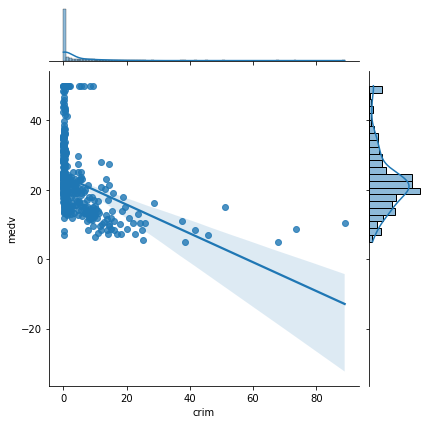

In [7]:
# 실제 집 값과 범죄율의 상관관계가 있는지 그래프를 통해 살펴봅시다.
# 범죄율이 높을 수록 집값이 낮다는 것을 알 수 있음 
sns.jointplot(data = data, x = 'crim', y = 'medv', kind = 'reg')

#### `x.cov(y)`

- 공분산을 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.cov()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [8]:
# 집값과 범죄율의 공분산을 확인해 봅시당
data['crim'].cov(data['medv'])

-30.718507964458173

##### '-30.718507964458173' 이라는 수치가 실제 범죄율과 집값사이에 얼마만큼의 상관성을 가지는 지는 알려주지 않는다 (공분산의 한계) 
##### 서로 음의 방향으로 진행된다는 정도만 알 수 있고 상관성은 상관계수를 통해 알 수 있다.


In [9]:
# 각 피쳐 간 공분산 분석 
data.cov()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
crim,73.986578,-40.215956,23.992339,0.419594,-1.325038,85.405322,-6.876722,844.821538,5.399331,-302.381816,27.986168,-30.718508
zn,-40.215956,543.936814,-85.412648,-1.396148,5.112513,-373.901548,32.629304,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
indus,23.992339,-85.412648,47.064442,0.607074,-1.887957,124.513903,-10.228097,833.360290,5.692104,-223.579756,29.580270,-30.520823
nox,0.419594,-1.396148,0.607074,0.013428,-0.024603,2.385927,-0.187696,13.046286,0.047397,-4.020570,0.488946,-0.455412
rm,-1.325038,5.112513,-1.887957,-0.024603,0.493671,-4.751929,0.303663,-34.583448,-0.540763,8.215006,-3.079741,4.493446
age,85.405322,-373.901548,124.513903,2.385927,-4.751929,792.358399,-44.329379,2402.690122,15.936921,-702.940328,121.077725,-97.589017
dis,-6.876722,32.629304,-10.228097,-0.187696,0.303663,-44.329379,4.434015,-189.664592,-1.059775,56.040356,-7.473329,4.840229
tax,844.821538,-1236.453735,833.360290,13.046286,-34.583448,2402.690122,-189.664592,28404.759488,168.153141,-6797.911215,654.714520,-726.255716
ptratio,5.399331,-19.776571,5.692104,0.047397,-0.540763,15.936921,-1.059775,168.153141,4.686989,-35.059527,5.782729,-10.110657
b,-302.381816,373.721402,-223.579756,-4.020570,8.215006,-702.940328,56.040356,-6797.911215,-35.059527,8334.752263,-238.667516,279.989834


#### `x.corr(y)`

- 상관계수를 확인하기 위한 함수입니다.
- x와 y에 같은 시리즈형의 데이터를 대입합니다.
- df.corr()처럼 데이터프레임을 x에 넣고 y자리에 아무것도 적지 않으면 각 변수별로 공분산을 계산하여 줍니다.

In [10]:
# 실제 범죄율과 집 값의 상관계수도 확인해봅시다.
data['crim'].corr(data['medv'])

-0.38830460858681143

In [11]:
# 각 피쳐 간 상괸관계 분석 
data.corr()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
b,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461


## 가설2 - 방의 개수가 많은 곳이 집 값이 비쌀까?

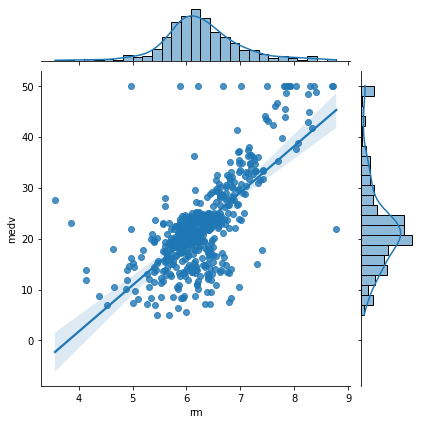

In [12]:
# 방의 갯수와 집값의 상관관계 분석 
sns.jointplot(data = data, x = 'rm', y = 'medv', kind = 'reg')
# 방의 갯수가 많을 수록 집값이 비싸다는 걸 알 수 있음 

In [13]:
# 방의 갯수와 집값의 상관 관계와 공분산도 알아보자 
# 높은 양의 상관관계 
data['rm'].corr(data['medv'])

0.6953599470715393

In [14]:
# 공분산
data['rm'].cov(data['medv'])
#공분산은 낮아도 상관계수는 높을 수 있다는 것을 반증하는 데이터 

4.493445879544476

#### `sns.heatmap(df, cmap, annot, fmt)`

- 앞에서 배운 heatmap의 심화
- cmap - 전체적인 색을 지정 (summer /  YlGnBu / RdYlGn_r 등)
- annot - True / False 로써 숫자를 표현해줄 것인지 기입
- fmt - 숫자의 소숫점 자리수 설정

<AxesSubplot:>

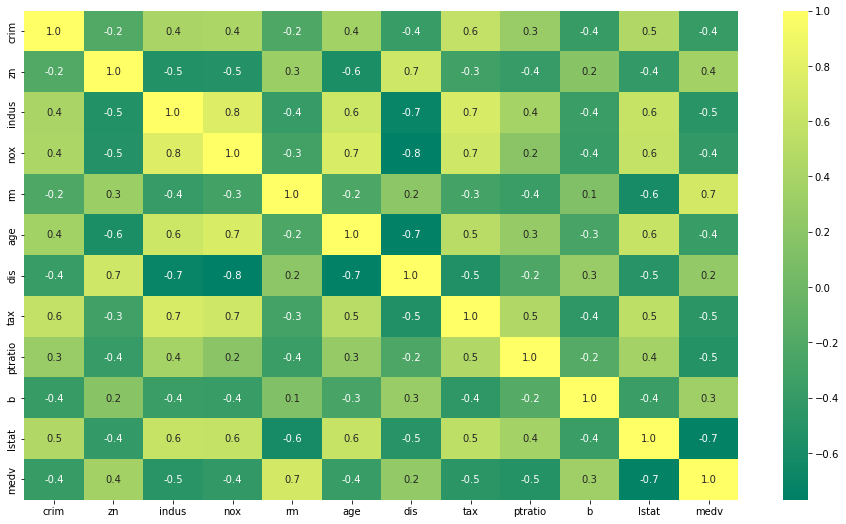

In [15]:
# 피쳐 별 상관관계를 heatmap으로 시각화 해준다
# 상관 계수 값 전체를 heatmap으로 표현한다는 의미.
plt.figure(figsize = (16,9))
sns.heatmap(data.corr(), cmap = 'summer', annot = True, fmt = '0.1f')

위의 Heatmap으로 알 수 있는 건 ?
- 
data['medv'] 랑 data['dis'] 와 data['b'] 의 상관관계가 너무 낮아서 변수추출 - PCA를 통해 1개의 새로운 변수로 합칠 예정 

# 2. Feature Extraction (변수추출)
`PCA`를 이용하여 새로운 변수를 만들어보자.

In [16]:
for column in data.columns :
    print(column)

crim
zn
indus
nox
rm
age
dis
tax
ptratio
b
lstat
medv


In [17]:
# 반복문으로 출력되는 값은? 각 컬럼들과 medv의 상관관계
for column in data.columns :
    print(data[column].corr(data['medv']))

-0.38830460858681143
0.3604453424505435
-0.48372516002837357
-0.42732077237328264
0.6953599470715393
-0.37695456500459623
0.24992873408590394
-0.46853593356776685
-0.5077866855375616
0.3334608196570666
-0.7376627261740151
1.0


In [18]:
# 변수들의 상관계수를 전부 확인하고 몇개의 변수를 몇개로 줄일 것인지 확인해보자


corr_bar = []
for column in data.columns :
    print(f'{column}과 medv의 상관관계 : {data["medv"].corr(data[column])}\n')
    corr_bar.append(data['medv'].corr(data[column]))

crim과 medv의 상관관계 : -0.38830460858681143

zn과 medv의 상관관계 : 0.3604453424505435

indus과 medv의 상관관계 : -0.48372516002837357

nox과 medv의 상관관계 : -0.42732077237328264

rm과 medv의 상관관계 : 0.6953599470715393

age과 medv의 상관관계 : -0.37695456500459623

dis과 medv의 상관관계 : 0.24992873408590394

tax과 medv의 상관관계 : -0.46853593356776685

ptratio과 medv의 상관관계 : -0.5077866855375616

b과 medv의 상관관계 : 0.3334608196570666

lstat과 medv의 상관관계 : -0.7376627261740151

medv과 medv의 상관관계 : 1.0



<AxesSubplot:>

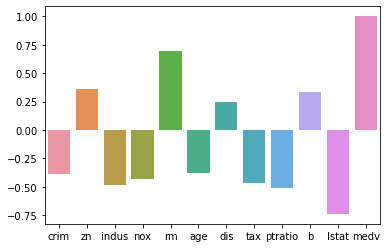

In [19]:
#barplot으로 수치형 피쳐별 data['medv']와의 상관관계 시각화 
sns.barplot(data.columns, corr_bar)

In [20]:
#data['dis'] & data['b'] -> 수치형 데이터 중 비교적 상관관계가 낮은 두개의 변수를 선택
x = data[['dis','b']]
x.sample(2)

,dis,b
110,2.7778,393.49
421,1.8746,319.98


In [21]:
#pca를 위한 라이브러리 불러오기 -> sklearn

from sklearn.decomposition import PCA

## 2.1 PCA

#### `PCA(n_components)`

- n_components : 몇가지의 변수를 만들지 개수를 정합니다.
- 객체를 생성하는 개념

#### `PCA.fit(x)`

- x의 데이터를 학습시킴으로써 앞에서 생성한 객체가 데이터를 공부하는 개념

#### `PCA.components_`

- 앞서 학습한 내용을 바탕으로 만들어진 변수속에 담긴 이 전 변수의 분산이 담김 정도

#### `PCA.explained_variance_ratio_`

- 새로운 변수가 설명하는 분산의 비율

#### `PCA.fit_transform`

- 학습한 내용을 바탕으로 만들어진 학습기로 x의 데이터를 변환

#### 2.1.1 객체생성  

p c a = P C A ( n _ c o m p o n e n t s = ? ) 

In [22]:
# 2개의 변수를 조합하여 1개의 변수를 만들어보자 
pca = PCA(n_components = 1)

#### 2.1.2 데이터학습

P C A . f i t ( x )

x는 상관계수가 낮은 컬럼들을 합친 서브셋을 변수로 지정한거라고 보면 됨 

In [23]:
# pca에 아까 만든 피쳐 2개의 조합 변수 x를 할당해 데이터를 학습시킨다.
pca.fit(x)

PCA(n_components=1)

#### 2.1.3 변수의 분산 확인

P C A . c o m p o n e n t s _

In [24]:
# x = data[['dis','b']]을 학습시켜 PC1이라는 하나의 새로운 변수로 만듬

In [25]:
#새로운 변수에 담긴 각 변수의 분산을 확인 할 수 있다. 
pca.components_

array([[-0.00672682, -0.99997737]])

array([[-0.00672682, -0.99997737]]) 가 의미하는 건 ...
- dis 와 b 각각의 분산이 담긴 비율

In [26]:
x.head()

,dis,b
0,4.0900,396.90
1,4.9671,396.90
2,4.9671,392.83
3,6.0622,394.63
4,6.0622,396.90


#### 2.1.3 변수의 분산 확인

P C A . e x p l a i n e d _ v a r i a n c e _ r a t i o _

In [27]:
# 새로운 변수 PC1이 설명하는 분산의 비율
pca.explained_variance_ratio_

array([0.9995135])

#### 2.1.4 변수를 데이터로 변환
P C A . t r a n s f o r m

d f [ ' 새 로 운 컬 럼 ' ] = p c a . t r a n s f o r m ( x ) 


- 위에서 fit 학습시킨 내용을 바탕으로 transform 함수를 실행한다

d f [ ' 새 로 운 컬 럼 ' ] = p c a . f i t _ t r a n s f o r m ( x ) 

- 학습과 변환을 동시에 진행한다

In [28]:
#새로운 변수 PC1을 data['pc1'] 이라는 새로운 컬럼으로 추가해주자
data['pc1'] = pca.fit_transform(x)

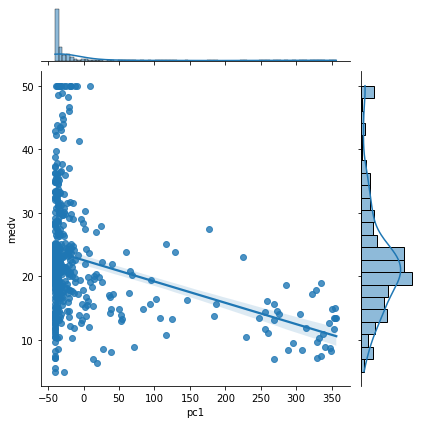

In [29]:
# data['pc1'] 과 data['medv']의 상관관계 확인해보기
sns.jointplot(data = data, x = 'pc1', y = 'medv', kind = 'reg')

In [30]:
# data['pc1'] 과 data['medv']의 상관계수
data['pc1'].corr(data['medv'])

-0.3334845106741897

##### 상관계수 해설 

-0.3334845106741897이 나온 이유는?

두 변수 (dis와 b)를 합친 pc1 이라는 새로운 변수를, 
array에 나열된 비율로 합칠거임
array([[-0.00672682, -0.99997737]])

        dis     ,    b 


즉 b의 비율이 99%로 담겼음

dis과 medv 의 상관관계 : 0.24992873408590394

b과 medv 의 상관관계 : 0.3334608196570666

※ 그래서 상관계수가 b와 medv의 상관관계값과 유사하게 출력된것임

b(흑인)비율을 조절하기 위해 ★정규화★ 작업 진행할거임


## 2.2 정규화
`정규화`를 진행하기 전과 진행한 후의 결과 차이를 보며 정규화를 왜 해야하는지 알아봅시다.

#### `StandardScaler()`

- 정규화 객체 생성

#### `scaler.fit(x)`

- 정규화 객체로 학습

#### `scaler.transform(x)`

- 학습된 학습기로 변수 x의 데이터를 변환

In [31]:
# 정규화에 필요한 라이브러리 로드 

from sklearn.preprocessing import StandardScaler

1. `StandardScaler()`

In [32]:
# 정규화 객체를 만들어 줍니다 
scaler = StandardScaler()

2. `scaler.fit(x)`

In [33]:
# x를 학습 시킨 후 변형하여 정규화 된 x로 만들어 준다 
scaler.fit(x)

StandardScaler()

3. `scaler.transform(x)`

In [34]:
scaler_x = scaler.transform(x)

In [35]:
scaler_x  # 변형된 데이터들을 의미

array([[ 0.1402136 ,  0.44105193],
       [ 0.55715988,  0.44105193],
       [ 0.55715988,  0.39642699],
       ...,
       [-0.77368357,  0.44105193],
       [-0.66843684,  0.4032249 ],
       [-0.61324648,  0.44105193]])

#### `PCA와 동일한 반복작업 수행`


In [36]:
#PCA의 갯수 찾기 
pca = PCA(n_components = 1)

#데이터 학습
pca.fit(scaler_x)

# 새로운 변수에 담긴 각 변수의 분산을 확인
# 위와 달라진 분산의 정도를 확인할 수 있습니다.
pca.components_

array([[-0.70710678, -0.70710678]])

array([[-0.00672682, -0.99997737]])

          dis     ,    b 
          
두 변수가 같은 비율로 변경됨

In [37]:
# 새로운 변수 PC1이 설명하는 분산의 비율입니다.
pca.explained_variance_ratio_

array([0.64575584])

비율이 0.64 정도로 낮아짐 

정규화 이전 PC1의 비율은 0.99 

In [38]:
# 위와 같이 pc1의 컬럼에 데이터를 넣어봅시다.
data['pc1'] = pca.fit_transform(scaler_x)

In [42]:
data.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv,pc1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-0.411017
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-0.705842
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-0.674288
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,-1.056346
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,-1.073946


정규화 이전 pc1 컬럼의 데이터와 비교해보면 수치가 변함

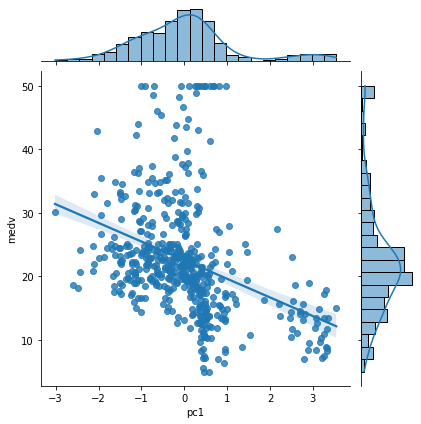

In [39]:
sns.jointplot(data=data, x = 'pc1', y='medv', kind='reg')

In [40]:
data['pc1'].corr(data['medv'])

-0.36298985100090203

In [43]:
data['b'].corr(data['medv'])

0.3334608196570666

pc1이 b보다 상관성이 조금 높아진 것을 알 수 있다. 

<AxesSubplot:xlabel='b', ylabel='Density'>

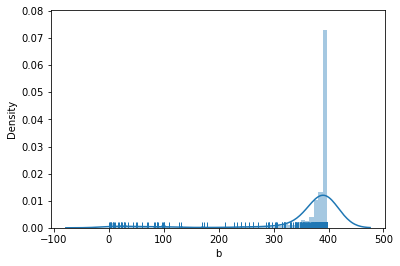

In [41]:
sns.distplot(x['b'], kde=True, rug=True)